### Import Libraries

In [1]:
pip install pandas matplotlib

     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB 1.4 MB/s eta 0:00:09
     ---------------------------------------- 0.1/11.3 MB 1.1 MB/s eta 0:00:11
      --------------------------------------- 0.2/11.3 MB 1.7 MB/s eta 0:00:07
     - -------------------------------------- 0.4/11.3 MB 2.2 MB/s eta 0:00:05
     - -------------------------------------- 0.5/11.3 MB 2.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/11.3 MB 3.1 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/11.3 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/11.3 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/11.3 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/11.3 MB 4.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.2/11.3 MB 4.4 MB/s eta 0:00:03
     -------- ------------------------------- 2.5/11.3 MB 4


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
data = pd.read_csv('2003_2017_waste.csv')

### Menampilkan 10 baris pertama dataset

In [4]:
data.head(10)

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016
5,Wood,119100,411600.0,530700,0.78,2016
6,Ferrous metal,6000,1351500.0,1357500,0.99,2016
7,Non-ferrous metal,1300,95900.0,97200,0.99,2016
8,Used slag,4100,247000.0,251100,0.98,2016
9,Ash & Sludge,199000,28300.0,227300,0.13,2016


### Melakukan standarisasi pada kolom was_type_mapping

In [5]:
# melihat kategori waste_type
was_types_mapping = {
    'Plastics': 'Plastics',
    'Plastic': 'Plastics',
    'Ferrous metal': 'Ferrous Metal',
    'Ferrous Metals': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Non-ferrous Metals': 'Non-Ferrous Metal',
    'Non-ferrous metals': 'Non-Ferrous Metal',
    'Ash & Sludge': 'Ash & Sludge',
    'Ash and sludge': 'Ash & Sludge',
    'Sludge': 'Ash & Sludge',
    'Construction Debris': 'Construction Debris',
    'C&D': 'Construction Debris',
    'Construction debris': 'Construction Debris',
    'Food waste': 'Food',
    'Food': 'Food',
    'Wood': 'Wood/Timber',
    'Wood/Timber': 'Wood/Timber',
    'Horticultural waste': 'Horticultural Waste',
    'Horticultural Waste': 'Horticultural Waste',
    'Paper/Cardboard': 'Paper/Cardboard',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Scrap Tyres': 'Scrap Tyres',
    'Used slag': 'Used Slag',
    'Used Slag': 'Used Slag',
    'Glass': 'Glass',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Others (stones, ceramics & rubber etc)': 'Others',
    'Others (stones, ceramic, rubber, etc.)': 'Others',
    'Others': 'Others'
}

data['was_type_maping'] = data['waste_type'].map(was_types_mapping).fillna('Others')
data.head(10)

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,was_type_maping
0,Food,679900,111100.0,791000,0.14,2016,Food
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016,Paper/Cardboard
2,Plastics,762700,59500.0,822200,0.07,2016,Plastics
3,C&D,9700,1585700.0,1595400,0.99,2016,Construction Debris
4,Horticultural waste,111500,209000.0,320500,0.65,2016,Horticultural Waste
5,Wood,119100,411600.0,530700,0.78,2016,Wood/Timber
6,Ferrous metal,6000,1351500.0,1357500,0.99,2016,Ferrous Metal
7,Non-ferrous metal,1300,95900.0,97200,0.99,2016,Non-Ferrous Metal
8,Used slag,4100,247000.0,251100,0.98,2016,Used Slag
9,Ash & Sludge,199000,28300.0,227300,0.13,2016,Ash & Sludge


### Melihat data waste_type setelah standarisasi

In [6]:
data_clean = data[data['was_type_maping'] != 'Total'].copy()
print(data_clean['was_type_maping'].unique())

['Food' 'Paper/Cardboard' 'Plastics' 'Construction Debris'
 'Horticultural Waste' 'Wood/Timber' 'Ferrous Metal' 'Non-Ferrous Metal'
 'Used Slag' 'Ash & Sludge' 'Glass' 'Textile/Leather' 'Scrap Tyres'
 'Others']


### Melihat data tahunan dari 2003-2017 berdasarkan total ton limbah yang dihasilkan

In [7]:
annual_waste_gen = data_clean.groupby('year')['total_waste_generated_tonne'].sum().reset_index()
print(annual_waste_gen)

    year  total_waste_generated_tonne
0   2003                      9456400
1   2004                      9579400
2   2005                     10036400
3   2006                     10441000
4   2007                     11201600
5   2008                     11940400
6   2009                     12228200
7   2010                     13034000
8   2011                     13796600
9   2012                     14539000
10  2013                     15703000
11  2014                     15028900
12  2015                     15347000
13  2016                     15628400
14  2017                     15408600


### Top 3 waste types dengan total ton limbah tertinggi

In [8]:
data_2017 = data_clean[data_clean['year'] == 2017]
top_3_waste_types_2017 = data_2017.groupby('was_type_maping')['total_waste_generated_tonne'].sum().nlargest(3).reset_index()
print(top_3_waste_types_2017)

       was_type_maping  total_waste_generated_tonne
0               Others                      8030700
1  Construction Debris                      1609300
2        Ferrous Metal                      1378800


### Rata-rata recycling rate dari tahun 2003-2017

In [9]:
avg_recycling_rate = data_clean.groupby('was_type_maping')['recycling_rate'].mean().sort_values(ascending=False).reset_index()
print(avg_recycling_rate)


        was_type_maping  recycling_rate
0   Construction Debris        0.976667
1             Used Slag        0.959333
2         Ferrous Metal        0.948750
3     Non-Ferrous Metal        0.854000
4           Scrap Tyres        0.799333
5           Wood/Timber        0.610667
6       Paper/Cardboard        0.506000
7   Horticultural Waste        0.488000
8                Others        0.417027
9                 Glass        0.170000
10                 Food        0.112000
11             Plastics        0.096000
12      Textile/Leather        0.080000
13         Ash & Sludge        0.040000


### Rata-rata recycling rate terbaik dan terburuk berdasarkan waste type

In [10]:
best_recycling_type = avg_recycling_rate.iloc[0]
worst_recycling_type = avg_recycling_rate.iloc[-1]

print(f"Best recycling type: {best_recycling_type['was_type_maping']} with average recycling rate of {best_recycling_type['recycling_rate']:.2f}%")
print(f"Worst recycling type: {worst_recycling_type['was_type_maping']} with average recycling rate of {worst_recycling_type['recycling_rate']:.2f}%")

Best recycling type: Construction Debris with average recycling rate of 0.98%
Worst recycling type: Ash & Sludge with average recycling rate of 0.04%


### Visualisasi tren limbah medis yang dihasilkan per tahun dari 2003-2017

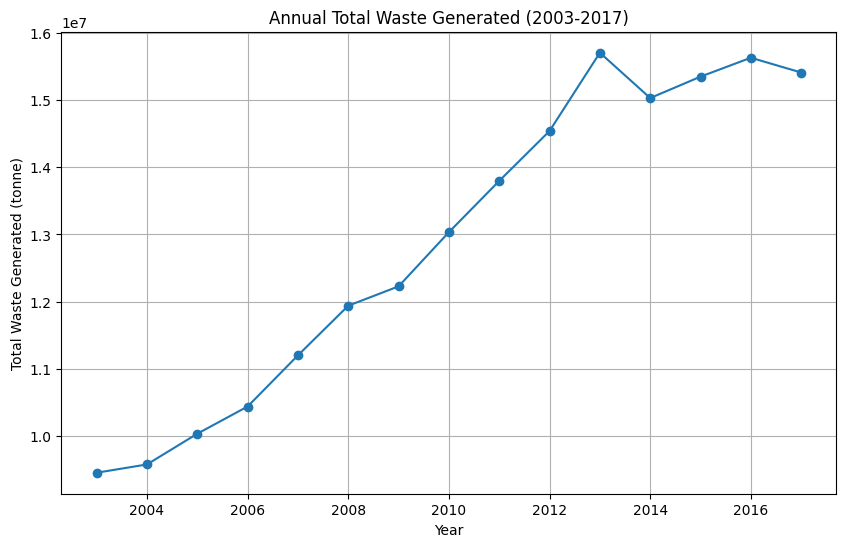

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(annual_waste_gen['year'], annual_waste_gen['total_waste_generated_tonne'], marker='o')
plt.title('Annual Total Waste Generated (2003-2017)')
plt.xlabel('Year')
plt.ylabel('Total Waste Generated (tonne)')
plt.grid(True)
plt.show()

### Visualisasi tren recycling rate plastik dari 2003-2017

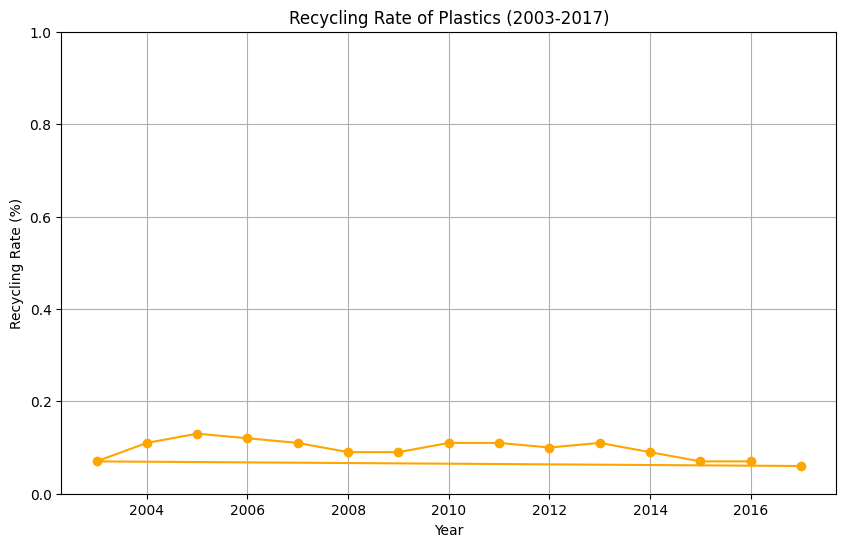

In [12]:
plastics_data = data_clean[data_clean['was_type_maping'] == 'Plastics']
plt.figure(figsize=(10, 6))
plt.plot(plastics_data['year'], plastics_data['recycling_rate'], marker='o', color='orange')
plt.title('Recycling Rate of Plastics (2003-2017)')
plt.xlabel('Year')
plt.ylabel('Recycling Rate (%)')
plt.ylim(0, 1)
plt.grid(True) 
plt.show()